In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [44]:
df=pd.read_csv('WA_Fn-UseC_-Marketing-Customer-Value-Analysis.csv')

In [45]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [46]:
df.shape

(9134, 24)

In [47]:
df.describe()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [48]:
df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [49]:
df.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [50]:
df.groupby('Response').count()['Customer']

Response
No     7826
Yes    1308
Name: Customer, dtype: int64

Text(0,0.5,'Count')

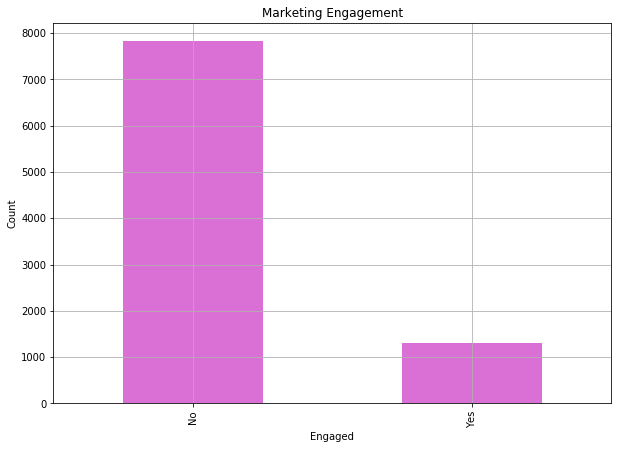

In [51]:
ax=df.groupby('Response').count()['Customer'].plot(kind='bar', color='orchid', grid=True,figsize=(10,7),title='Marketing Engagement')
ax.set_xlabel('Engaged')
ax.set_ylabel('Count')

In [52]:
df.groupby('Response').count()['Customer']/df.shape[0]

Response
No     0.856799
Yes    0.143201
Name: Customer, dtype: float64

In [53]:
by_offer_type_df=df.loc[
    df['Response']== 'Yes',
].groupby(['Renew Offer Type']).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']
by_offer_type_df

Renew Offer Type
Offer1    0.158316
Offer2    0.233766
Offer3    0.020950
Offer4         NaN
Name: Customer, dtype: float64

Text(0,0.5,'Engagement Rate (%)')

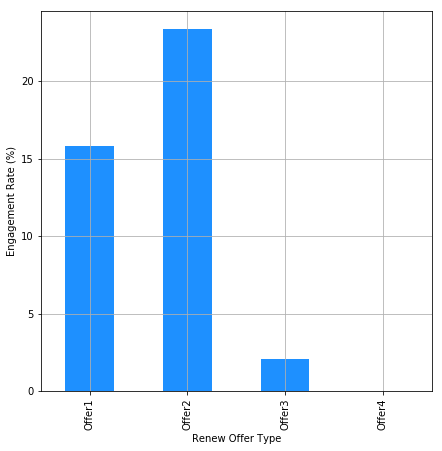

In [54]:
ax=(by_offer_type_df*100.0).plot(kind='bar', color='dodgerblue', grid=True,figsize=(7,7))
ax.set_xlabel('Renew Offer Type')
ax.set_ylabel('Engagement Rate (%)')

In [55]:
by_offer_type_df=df.loc[
    df['Response']== 'Yes',
].groupby(['Renew Offer Type','Vehicle Class']).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']
by_offer_type_df

Renew Offer Type  Vehicle Class
Offer1            Four-Door Car    0.070362
                  Luxury Car       0.001599
                  Luxury SUV       0.004797
                  SUV              0.044776
                  Sports Car       0.011194
                  Two-Door Car     0.025586
Offer2            Four-Door Car    0.114833
                  Luxury Car       0.002051
                  Luxury SUV       0.004101
                  SUV              0.041012
                  Sports Car       0.016405
                  Two-Door Car     0.055366
Offer3            Four-Door Car    0.016760
                  Two-Door Car     0.004190
Name: Customer, dtype: float64

In [56]:
by_offer_type_df=by_offer_type_df.unstack().fillna(0)
by_offer_type_df

Vehicle Class,Four-Door Car,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
Renew Offer Type,,,,,,
Offer1,0.070362,0.001599,0.004797,0.044776,0.011194,0.025586
Offer2,0.114833,0.002051,0.004101,0.041012,0.016405,0.055366
Offer3,0.016760,0.000000,0.000000,0.000000,0.000000,0.004190


Text(0,0.5,'Engagement Rate (%)')

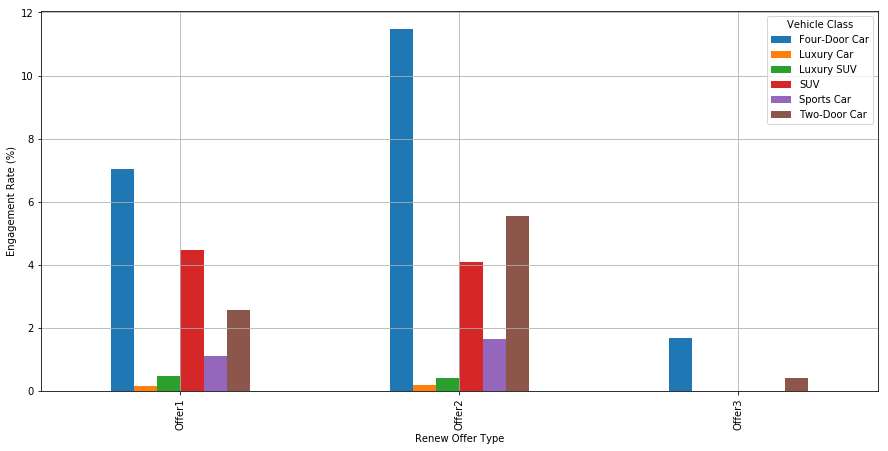

In [57]:
ax=(by_offer_type_df*100.0).plot(kind='bar', grid=True,figsize=(15,7))
ax.set_xlabel('Renew Offer Type')
ax.set_ylabel('Engagement Rate (%)')

In [58]:
by_offer_type_df=df.loc[
    df['Response']== 'Yes',
].groupby(['Renew Offer Type','Vehicle Class','Vehicle Size']).count()['Customer']/df.groupby('Renew Offer Type').count()['Customer']
by_offer_type_df

Renew Offer Type  Vehicle Class  Vehicle Size
Offer1            Four-Door Car  Large           0.011194
                                 Medsize         0.049574
                                 Small           0.009595
                  Luxury Car     Small           0.001599
                  Luxury SUV     Medsize         0.004797
                  SUV            Large           0.004797
                                 Medsize         0.035181
                                 Small           0.004797
                  Sports Car     Large           0.003198
                                 Medsize         0.007996
                  Two-Door Car   Large           0.001599
                                 Medsize         0.020789
                                 Small           0.003198
Offer2            Four-Door Car  Large           0.014354
                                 Medsize         0.079973
                                 Small           0.020506
                  Luxury C

In [59]:
by_offer_type_df=by_offer_type_df.unstack().fillna(0)
by_offer_type_df

Vehicle Size                       Large   Medsize     Small
Renew Offer Type Vehicle Class                              
Offer1           Four-Door Car  0.011194  0.049574  0.009595
                 Luxury Car     0.000000  0.000000  0.001599
                 Luxury SUV     0.000000  0.004797  0.000000
                 SUV            0.004797  0.035181  0.004797
                 Sports Car     0.003198  0.007996  0.000000
                 Two-Door Car   0.001599  0.020789  0.003198
Offer2           Four-Door Car  0.014354  0.079973  0.020506
                 Luxury Car     0.000000  0.002051  0.000000
                 Luxury SUV     0.000000  0.002051  0.002051
                 SUV            0.006152  0.028708  0.006152
                 Sports Car     0.000000  0.016405  0.000000
                 Two-Door Car   0.010253  0.034860  0.010253
Offer3           Four-Door Car  0.000000  0.012570  0.004190
                 Two-Door Car   0.000000  0.000000  0.004190

Text(0,0.5,'Engagement Rate (%)')

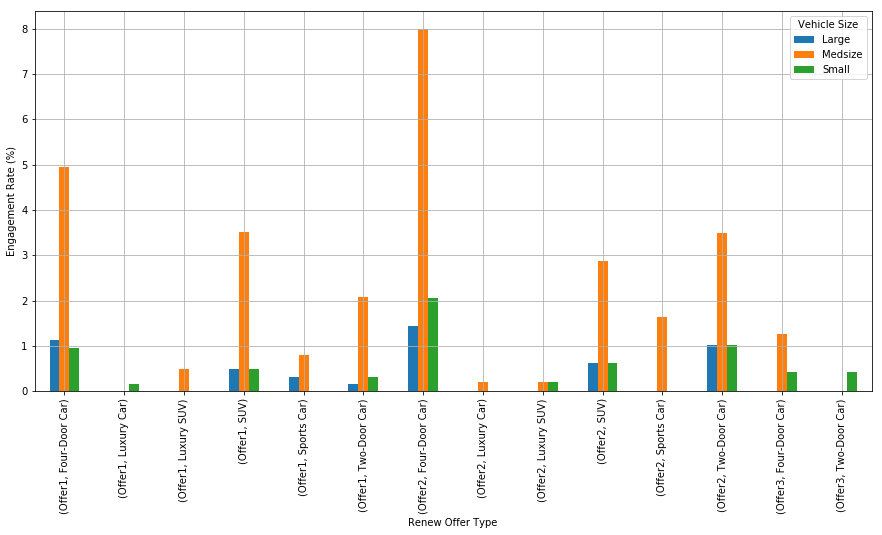

In [60]:
ax=(by_offer_type_df*100.0).plot(kind='bar', grid=True,figsize=(15,7))
ax.set_xlabel('Renew Offer Type')
ax.set_ylabel('Engagement Rate (%)')

In [61]:
by_sales_channel_df=df.loc[
    df['Response']== 'Yes',
].groupby(['Sales Channel']).count()['Customer']/df.groupby('Sales Channel').count()['Customer']
by_sales_channel_df

Sales Channel
Agent          0.191544
Branch         0.114531
Call Center    0.108782
Web            0.117736
Name: Customer, dtype: float64

Text(0,0.5,'Engagement Rate (%)')

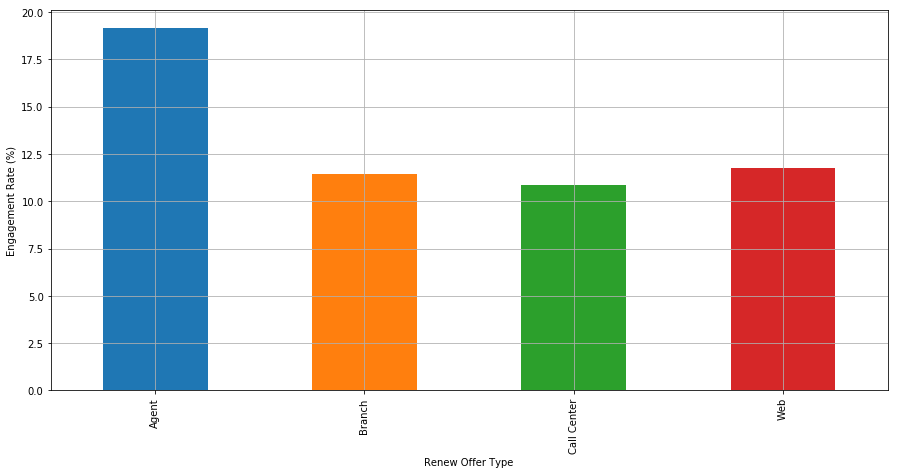

In [62]:
ax=(by_sales_channel_df*100.0).plot(kind='bar', grid=True,figsize=(15,7))
ax.set_xlabel('Renew Offer Type')
ax.set_ylabel('Engagement Rate (%)')

In [63]:
by_sales_channel_df=df.loc[
    df['Response']== 'Yes',
].groupby(['Sales Channel','Vehicle Size']).count()['Customer']/df.groupby('Sales Channel').count()['Customer']
by_sales_channel_df

Sales Channel  Vehicle Size
Agent          Large           0.020708
               Medsize         0.144953
               Small           0.025884
Branch         Large           0.021036
               Medsize         0.074795
               Small           0.018699
Call Center    Large           0.013598
               Medsize         0.067989
               Small           0.027195
Web            Large           0.013585
               Medsize         0.095094
               Small           0.009057
Name: Customer, dtype: float64

In [64]:
by_sales_channel_df=by_sales_channel_df.unstack().fillna(0)
by_sales_channel_df

Vehicle Size,Large,Medsize,Small
Sales Channel,,,
Agent,0.020708,0.144953,0.025884
Branch,0.021036,0.074795,0.018699
Call Center,0.013598,0.067989,0.027195
Web,0.013585,0.095094,0.009057


Text(0,0.5,'Engagement Rate (%)')

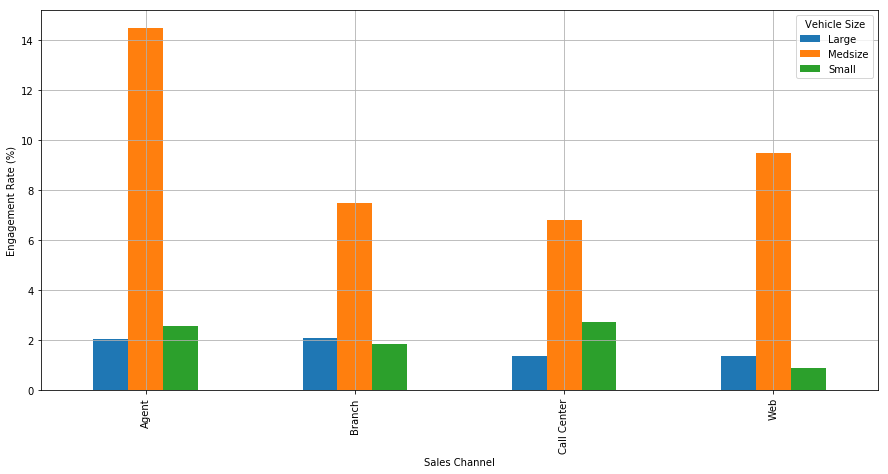

In [65]:
ax=(by_sales_channel_df*100.0).plot(kind='bar', grid=True,figsize=(15,7))
ax.set_xlabel('Sales Channel')
ax.set_ylabel('Engagement Rate (%)')

In [66]:
by_Months_since_inception_df=df.loc[
    df['Response']== 'Yes',
].groupby(['Months Since Policy Inception']).count()['Response']/df.groupby('Months Since Policy Inception')['Response'].count()*100
by_Months_since_inception_df.fillna(0)

Months Since Policy Inception
0     14.457831
1     14.117647
2     20.224719
3     26.315789
4     19.780220
5      6.896552
6      0.000000
7      7.594937
8      7.407407
9     18.750000
10    15.789474
11    17.307692
12     6.000000
13    14.814815
14     0.000000
15    22.018349
16     0.000000
17    11.881188
18    13.333333
19    16.981132
20    11.650485
21    11.428571
22    12.903226
23    20.454545
24    21.951220
25    13.483146
26    15.000000
27    12.371134
28    17.475728
29    12.244898
        ...    
70    23.529412
71    12.000000
72    23.762376
73     6.818182
74    19.780220
75     6.122449
76     6.976744
77    18.947368
78     7.317073
79    11.881188
80    16.438356
81    15.789474
82     0.000000
83    24.000000
84     6.000000
85    14.117647
86     0.000000
87     7.894737
88     7.894737
89    18.556701
90    14.285714
91     8.000000
92    16.216216
93    26.666667
94    25.000000
95    15.584416
96    17.910448
97     0.000000
98     0.000000
99     7.6

Text(0,0.5,'Engagement Rate (%)')

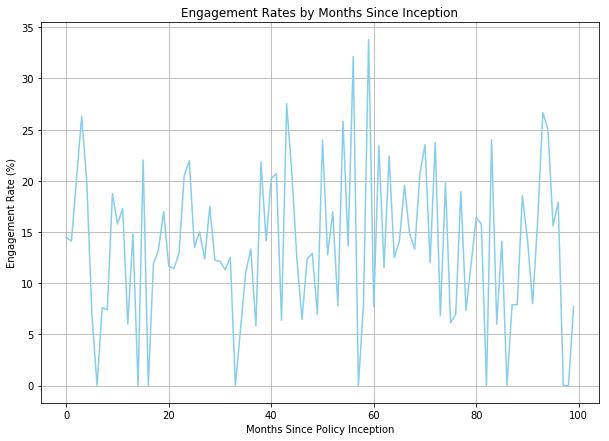

In [67]:
ax=by_Months_since_inception_df.fillna(0).plot( grid=True,figsize=(10,7),color='skyblue', title='Engagement Rates by Months Since Inception')
ax.set_xlabel('Months Since Policy Inception')
ax.set_ylabel('Engagement Rate (%)')

In [68]:
df['Customer Lifetime Value'].describe()

count     9134.000000
mean      8004.940475
std       6870.967608
min       1898.007675
25%       3994.251794
50%       5780.182197
75%       8962.167041
max      83325.381190
Name: Customer Lifetime Value, dtype: float64

In [69]:
df['CLV Segment']=df['Customer Lifetime Value'].apply(lambda x:'High' if x>df['Customer Lifetime Value'].median()else 'Low')

In [71]:
df['Months Since Policy Inception'].describe()

count    9134.000000
mean       48.064594
std        27.905991
min         0.000000
25%        24.000000
50%        48.000000
75%        71.000000
max        99.000000
Name: Months Since Policy Inception, dtype: float64

In [75]:
df['Policy Age Segment']=df['Months Since Policy Inception'].apply(lambda x:'High' if x>df['Months Since Policy Inception'].median() else 'Low')

In [76]:
df['Policy Age Segment'] = df['Months Since Policy Inception'].apply(
    lambda x: 'High' if x > df['Months Since Policy Inception'].median() else 'Low'
)

In [77]:
df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,CLV Segment,Is.Female,Policy Age Segment
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Low,1,Low
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,High,1,Low
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,High,1,Low
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,High,0,High
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Low,0,Low


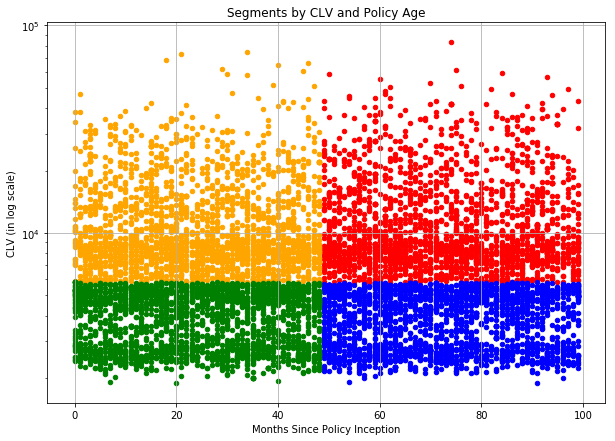

In [78]:

ax = df.loc[
    (df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='red'
)

df.loc[
    (df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'High')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='blue'
)

df.loc[
    (df['CLV Segment'] == 'High') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='orange'
)

df.loc[
    (df['CLV Segment'] == 'Low') & (df['Policy Age Segment'] == 'Low')
].plot.scatter(
    ax=ax,
    x='Months Since Policy Inception',
    y='Customer Lifetime Value',
    logy=True,
    color='green',
    grid=True,
    figsize=(10, 7)
)

ax.set_ylabel('CLV (in log scale)')
ax.set_xlabel('Months Since Policy Inception')

ax.set_title('Segments by CLV and Policy Age')

plt.show()

In [79]:
engagment_rates_by_segment_df = df.loc[
    df['Response'] == 'Yes'
].groupby(
    ['CLV Segment', 'Policy Age Segment']
).count()['Customer']/df.groupby(
    ['CLV Segment', 'Policy Age Segment']
).count()['Customer']

engagment_rates_by_segment_df

CLV Segment  Policy Age Segment
High         High                  0.138728
             Low                   0.132067
Low          High                  0.162450
             Low                   0.139957
Name: Customer, dtype: float64

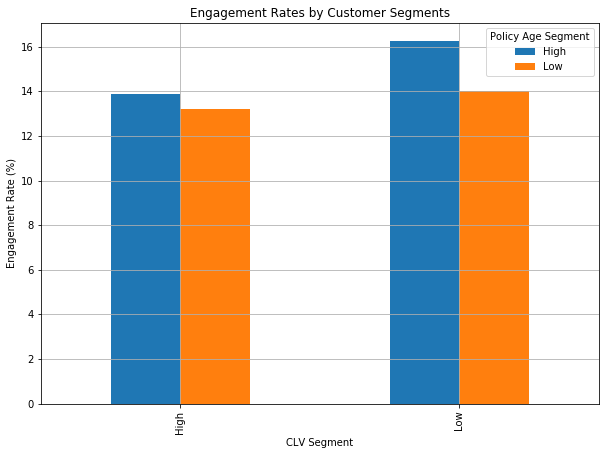

In [80]:
ax = (engagment_rates_by_segment_df.unstack()*100.0).plot(
    kind='bar',
    figsize=(10, 7),
    grid=True
)
ax.set_ylabel('Engagement Rate (%)')
ax.set_title('Engagement Rates by Customer Segments')

plt.show()

In [ ]:
# As we can notice, High Policy Age Segment has higher engagement than the Low Policy Age
Segment. This suggests that those customers who have been insured by this company longer re-
spond better. Moreover, the High Policy Age and Low CLV segment has the highest engagement
rate among the four segments.
By creating different customer segments based on customer attributes, we can better under-
stand how different groups of customers behave differently, and consequently, use this informa-
tion to customize the marketing messagges.